# Multi class image classification

1. Become one with the data
2. Preprocess with the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat untill satisfied

In [1]:
import zipfile
import requests

# URL of the file to download
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"

# Download the file
response = requests.get(url)
zip_file_path = "10_food_classes_all_data.zip"

# Save the downloaded file
with open(zip_file_path, "wb") as file:
    file.write(response.content)

# Unzip the downloaded file
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall()


KeyboardInterrupt: 

In [2]:
import os 

# Walk through 10 classes of fod image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [3]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}") # Show the shape of the image

    return img

['2581276.jpg']
Image shape: (512, 512, 3)


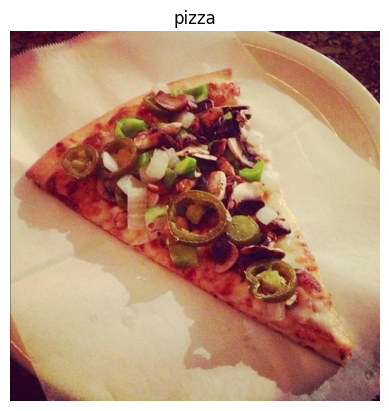

In [6]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))


2. Preprocess the data

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [8]:
# Create a modeld
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential

In [9]:
model_1 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

In [10]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [11]:
history_1 = model_1.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 117s 459ms/step - loss: 2.1284 - accuracy: 0.2211 - val_loss: 1.9053 - val_accuracy: 0.3356
Epoch 2/5
235/235 [==============================] - 31s 133ms/step - loss: 1.8240 - accuracy: 0.3744 - val_loss: 1.8513 - val_accuracy: 0.3556
Epoch 3/5
235/235 [==============================] - 32s 137ms/step - loss: 1.4074 - accuracy: 0.5299 - val_loss: 1.9834 - val_accuracy: 0.3256
Epoch 4/5
235/235 [==============================] - 34s 144ms/step - loss: 0.7614 - accuracy: 0.7548 - val_loss: 2.6155 - val_accuracy: 0.2992
Epoch 5/5
235/235 [==============================] - 35s 147ms/step - loss: 0.2830 - accuracy: 0.9137 - val_loss: 3.6227 - val_accuracy: 0.2680


In [12]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

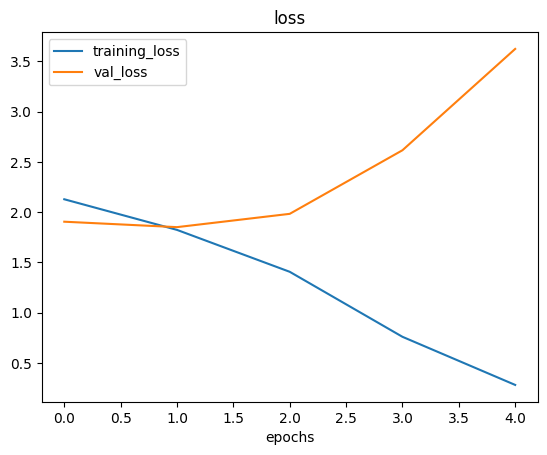

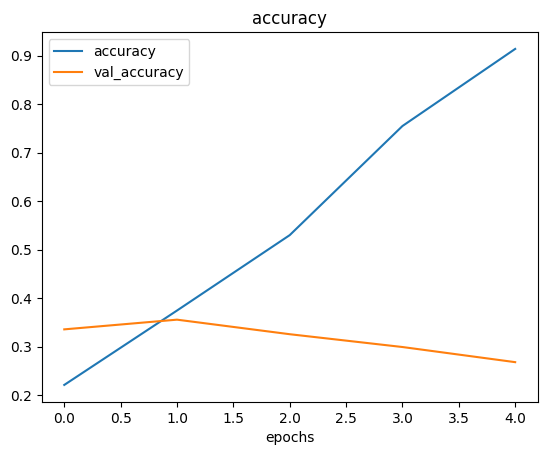

In [13]:
plot_loss_curves(history_1)

<Axes: >

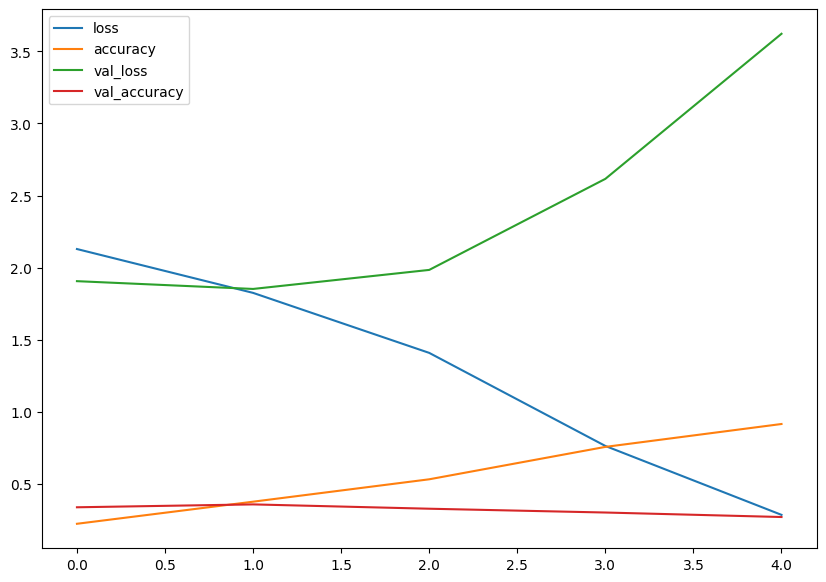

In [14]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7))


## Trying to do some hyperparameters changes to reduce overfitting. We Can do this by

* Get more data
* Simplify means we can reduce the number of layers or number of hidden layers
* Use data augmentation
* Use Transfer learning

Lets simplify the model

In [15]:
model_3 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_3.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 35s 146ms/step - loss: 2.2290 - accuracy: 0.2020 - val_loss: 2.0188 - val_accuracy: 0.2636
Epoch 2/5
235/235 [==============================] - 33s 140ms/step - loss: 1.8172 - accuracy: 0.3715 - val_loss: 1.9356 - val_accuracy: 0.3332
Epoch 3/5
235/235 [==============================] - 32s 138ms/step - loss: 1.4021 - accuracy: 0.5361 - val_loss: 2.0448 - val_accuracy: 0.3188
Epoch 4/5
235/235 [==============================] - 31s 131ms/step - loss: 0.8983 - accuracy: 0.7219 - val_loss: 2.4642 - val_accuracy: 0.3084
Epoch 5/5
235/235 [==============================] - 32s 136ms/step - loss: 0.4747 - accuracy: 0.8679 - val_loss: 2.9132 - val_accuracy: 0.2872


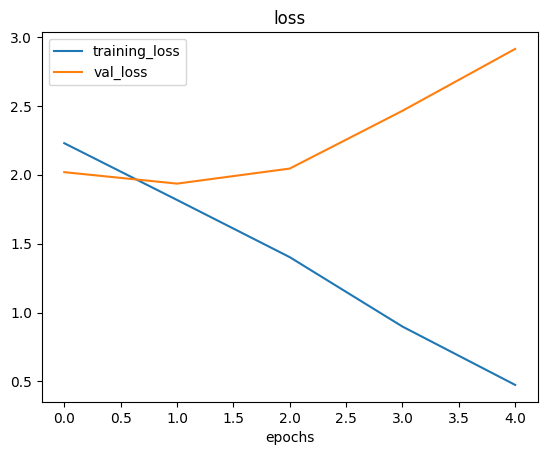

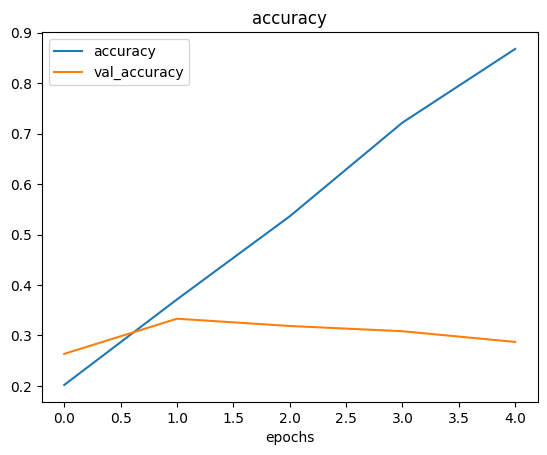

In [16]:
plot_loss_curves(history_3)

In [17]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

# it's still overfitting. Lets try to do some data augmentation

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random

# Define the directories
train_dir = "C:/Tensorflow/10_food_classes_all_data/train"
test_dir = "C:/Tensorflow/10_food_classes_all_data/test"

In [19]:
# Create an ImageDataGenerator for the data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [20]:
# Create an ImageDataGenerator for non-augmented data
train_datagen = ImageDataGenerator(rescale=1./255)

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)


In [21]:
# Import data and augment it from traininf directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

print("Non-augmented test images")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


Augmented training images:
Found 7500 images belonging to 10 classes.
Non-augmented training images:
Found 7500 images belonging to 10 classes.
Non-augmented test images
Found 2500 images belonging to 10 classes.


In [22]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number: 12


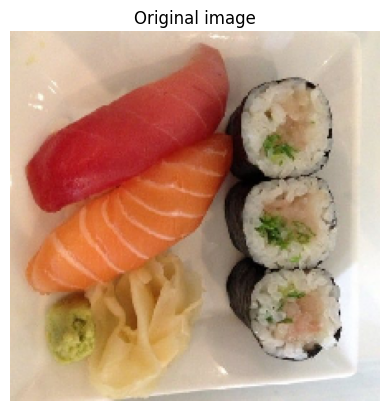

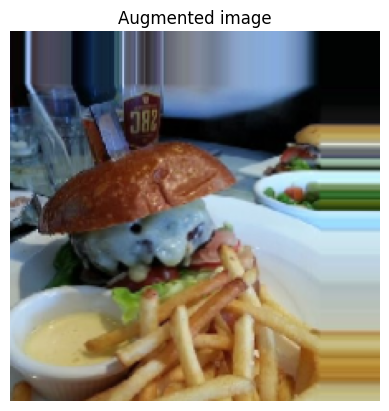

In [23]:
random_number = random.randint(0, 31)
print(f"Showing image number: {random_number}")

plt.imshow(images[random_number])
plt.title("Original image")
plt.axis("off")

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis("off")
plt.show()

In [24]:
# Building a model using the augmente data
model_4 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="sigmoid")
])

model_4.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data_augmented, epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 101s 427ms/step - loss: 2.1931 - accuracy: 0.2004 - val_loss: 1.9960 - val_accuracy: 0.3096
Epoch 2/5
235/235 [==============================] - 99s 421ms/step - loss: 2.0541 - accuracy: 0.2759 - val_loss: 1.9294 - val_accuracy: 0.3260
Epoch 3/5
235/235 [==============================] - 97s 414ms/step - loss: 2.0179 - accuracy: 0.2941 - val_loss: 1.8979 - val_accuracy: 0.3392
Epoch 4/5
235/235 [==============================] - 98s 416ms/step - loss: 1.9723 - accuracy: 0.3184 - val_loss: 1.9498 - val_accuracy: 0.3304
Epoch 5/5
235/235 [==============================] - 97s 411ms/step - loss: 1.9555 - accuracy: 0.3241 - val_loss: 1.8661 - val_accuracy: 0.3656


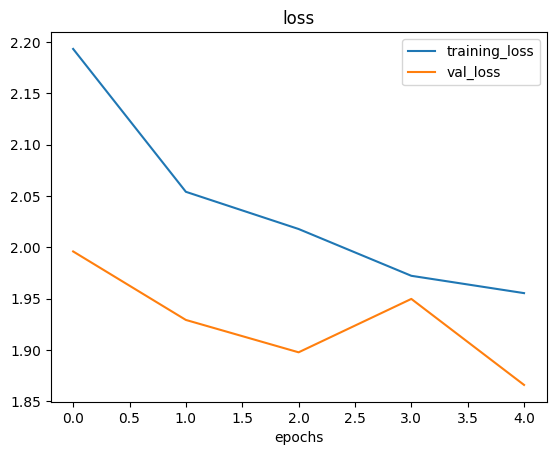

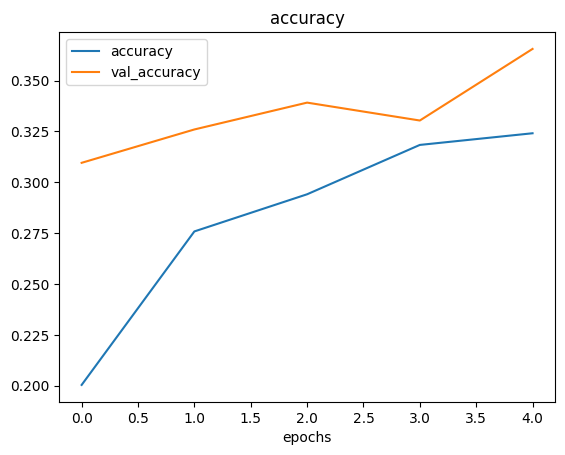

In [25]:
plot_loss_curves(history_4)

In [26]:
# Trying our another model
model_5 = Sequential([
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3),
    MaxPooling2D(),
    Conv2D(10, 3),
    Conv2D(10, 3),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="sigmoid")
])

model_5.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data_augmented, epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 99s 419ms/step - loss: 2.1846 - accuracy: 0.2141 - val_loss: 1.9622 - val_accuracy: 0.3152
Epoch 2/5
235/235 [==============================] - 107s 454ms/step - loss: 2.0747 - accuracy: 0.2612 - val_loss: 1.9829 - val_accuracy: 0.3004
Epoch 3/5
235/235 [==============================] - 98s 415ms/step - loss: 2.0368 - accuracy: 0.2867 - val_loss: 1.8642 - val_accuracy: 0.3508
Epoch 4/5
235/235 [==============================] - 98s 416ms/step - loss: 2.0093 - accuracy: 0.2991 - val_loss: 1.9986 - val_accuracy: 0.3128
Epoch 5/5
235/235 [==============================] - 98s 418ms/step - loss: 1.9774 - accuracy: 0.3093 - val_loss: 1.8074 - val_accuracy: 0.3804


In [27]:
model_5.evaluate(test_data)

79/79 [==============================] - 9s 108ms/step - loss: 1.8074 - accuracy: 0.3804


[1.8073540925979614, 0.38040000200271606]

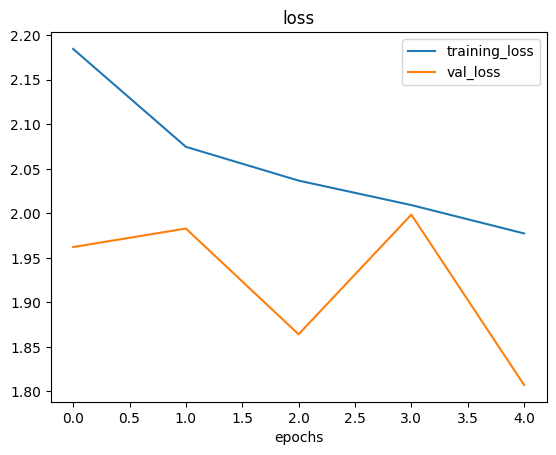

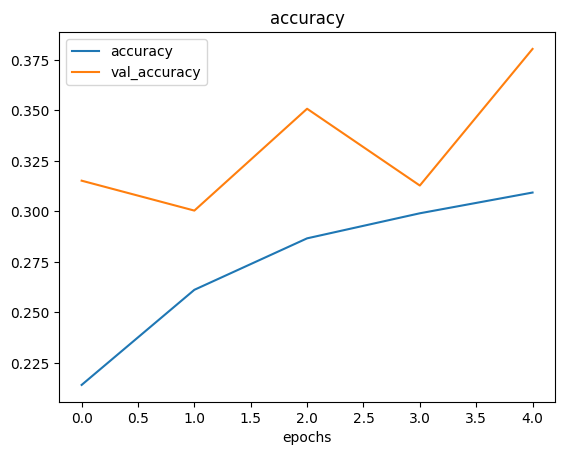

In [28]:
plot_loss_curves(history_5)

That looks much better, the loss curves are much cloaser to each other than the baseline model and they look like they're heading in the right direction. So if we were to train for longer, we might see further improvements!

In [29]:
# Trying our another model
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3),
    MaxPooling2D(),
    Conv2D(10, 3),
    Conv2D(10, 3),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="sigmoid")
])

model_6.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented, epochs=20,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
235/235 [==============================] - 108s 457ms/step - loss: 2.3049 - accuracy: 0.1869 - val_loss: 2.1120 - val_accuracy: 0.2368
Epoch 2/20
235/235 [==============================] - 101s 429ms/step - loss: 2.1118 - accuracy: 0.2513 - val_loss: 1.9686 - val_accuracy: 0.3052
Epoch 3/20
235/235 [==============================] - 102s 435ms/step - loss: 2.0427 - accuracy: 0.2841 - val_loss: 1.8882 - val_accuracy: 0.3472
Epoch 4/20
235/235 [==============================] - 102s 436ms/step - loss: 2.0163 - accuracy: 0.2960 - val_loss: 1.9743 - val_accuracy: 0.3160
Epoch 5/20
235/235 [==============================] - 114s 485ms/step - loss: 1.9807 - accuracy: 0.3108 - val_loss: 1.8536 - val_accuracy: 0.3520
Epoch 6/20
235/235 [==============================] - 101s 429ms/step - loss: 1.9657 - accuracy: 0.3160 - val_loss: 1.7978 - val_accuracy: 0.3760
Epoch 7/20
235/235 [==============================] - 107s 456ms/step - loss: 1.9600 - accuracy: 0.3208 - val_loss: 1.8893 -

In [30]:
model_6.evaluate(test_data)

79/79 [==============================] - 8s 102ms/step - loss: 1.6167 - accuracy: 0.4496


[1.6166962385177612, 0.4496000111103058]

In [32]:
model_5.evaluate(test_data)

79/79 [==============================] - 10s 124ms/step - loss: 1.8074 - accuracy: 0.3804


[1.80735445022583, 0.38040000200271606]

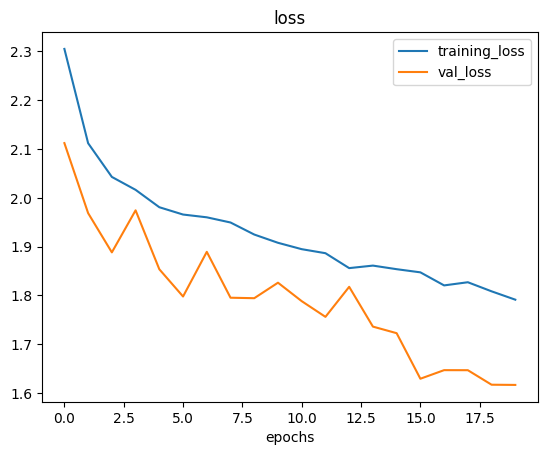

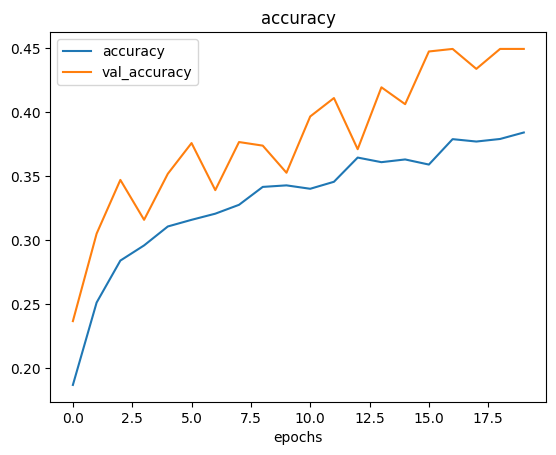

In [31]:
plot_loss_curves(history_6)

Making prediction on our trained model

In [33]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [35]:
import requests

# Define URLs
urls = [
    "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg",
    "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg",
    "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg"
]

# Download images
for url in urls:
    filename = url.split("/")[-1]
    response = requests.get(url)
    with open(filename, "wb") as f:
        f.write(response.content)
        print(f"Downloaded {filename}")


Downloaded 03-sushi.jpeg
Downloaded 03-hamburger.jpeg
Downloaded 03-pizza-dad.jpeg


In [38]:
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it 
    to (img_shape, img_shape, color_channels) 
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decoce the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image
    img = img/255.

    return img

In [45]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image and located at filename, makes a prediction with model
    and plots the image with the predicted class as the title
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    print(len(pred[0]))
    print(tf.argmax(pred))
    # Make logic for multi class
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 31ms/step
10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


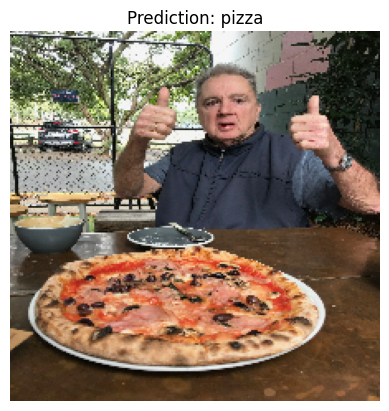

In [46]:
# Make a predictin using the above function
pred_and_plot(model=model_6, filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 33ms/step
10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


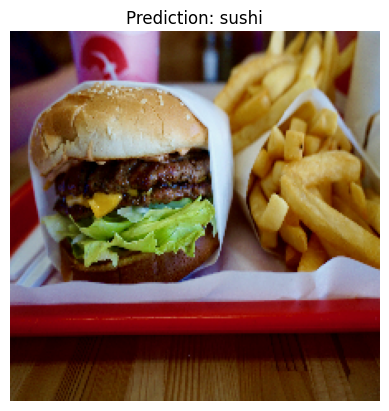

In [51]:
pred_and_plot(model=model_6, filename="03-hamburger.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 28ms/step
10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


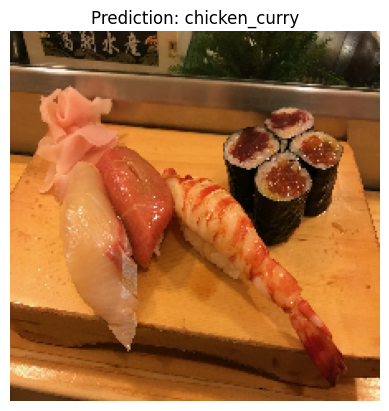

In [52]:
pred_and_plot(model=model_6, filename="03-sushi.jpeg",
              class_names=class_names)

Looks like our model didn't performed well on our custom images, but the accuracy is very low so we can expect very poor performance

# Saving and deploying the model

In [53]:
model_6.save("saved_CNN_model_6_multiclass_classification")

INFO:tensorflow:Assets written to: saved_CNN_model_6_multiclass_classification\assets


INFO:tensorflow:Assets written to: saved_CNN_model_6_multiclass_classification\assets


In [55]:
# Load the model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_CNN_model_6_multiclass_classification")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 10s 119ms/step - loss: 1.6167 - accuracy: 0.4496


[1.6166956424713135, 0.4496000111103058]

In [56]:
# Compare our loaded model with the existing one
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 10s 125ms/step - loss: 1.6167 - accuracy: 0.4496


[1.6166962385177612, 0.4496000111103058]